In [1]:
##importing the libraries for data
import warnings
warnings.filterwarnings('ignore')
import pandas as pd ##data processing
import numpy as np ##array processing
import os ##data importing
## data analysis
import matplotlib.pyplot as plt ##plots
import seaborn as sns ##graphs
import csv


In [2]:
#importing the dataset file
data=pd.read_csv(r'C:/Users/TEJASREE BHAVANI/OneDrive\Desktop/project102/Reviews.csv')


In [3]:
#printing the first five values of data
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [4]:
##shape is used to know the no.of rows and no.of columns in the dataset
data.shape

(568454, 10)

In [5]:
###to know the column names
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
##info is used for clear information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
##it describes the data
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [8]:
##checking missing values
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [9]:
# Instead of trying to fill missing values with the mean, 
# which is not suitable for string data, you should use a more appropriate strategy.
# One common approach is to fill missing values with a placeholder string like "Unknown".
data['ProfileName'] = data['ProfileName'].fillna('Unknown')

In [10]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName                0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [11]:
# Instead of trying to fill missing values with the mean, 
# which is not suitable for string data, you should use a more appropriate strategy.
# One common approach is to fill missing values with a placeholder string like "Unknown".
data['Summary'] = data['Summary'].fillna('Unknown')

In [12]:
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [13]:
# Simple imputer is used for fill the data in place of missing values
from sklearn.impute import SimpleImputer
num_feature=['Score','HelpfulnessNumerator','HelpfulnessDenominator']
##finding the average for the num_feature
impute=SimpleImputer(strategy='mean')
# Calculates the necessary parameters for the transformation based on the 
#  provided and transform makes the data to transform from one format to another formant
data[num_feature]=impute.fit_transform(data[num_feature])

In [14]:
# printing the number_feature
print(data[num_feature])

        Score  HelpfulnessNumerator  HelpfulnessDenominator
0         5.0                   1.0                     1.0
1         1.0                   0.0                     0.0
2         4.0                   1.0                     1.0
3         2.0                   3.0                     3.0
4         5.0                   0.0                     0.0
...       ...                   ...                     ...
568449    5.0                   0.0                     0.0
568450    2.0                   0.0                     0.0
568451    5.0                   2.0                     2.0
568452    5.0                   1.0                     1.0
568453    5.0                   0.0                     0.0

[568454 rows x 3 columns]


In [15]:
cat_feature=['ProductId','UserId','ProfileName']
# finding the most frequent values from the categoricalvalue
impute=SimpleImputer(strategy='most_frequent')
data[cat_feature]=impute.fit_transform(data[cat_feature])

In [16]:
print(data[cat_feature])

         ProductId          UserId                      ProfileName
0       B001E4KFG0  A3SGXH7AUHU8GW                       delmartian
1       B00813GRG4  A1D87F6ZCVE5NK                           dll pa
2       B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"
3       B000UA0QIQ  A395BORC6FGVXV                             Karl
4       B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"
...            ...             ...                              ...
568449  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter
568450  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer
568451  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"
568452  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"
568453  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17

[568454 rows x 3 columns]


In [17]:
# OneHotEncoder used for converting the categorical data into numerical data
from sklearn.preprocessing import OneHotEncoder
# in the below code 'ignore' is used for ignoring the new values while executing the code
encoder=OneHotEncoder(handle_unknown='ignore',sparse_output=True)
encoded_features=encoder.fit_transform(data[['ProductId','UserId','ProfileName']])

In [18]:
print(encoded_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1705362 stored elements and shape (568454, 548732)>
  Coords	Values
  (0, 27619)	1.0
  (0, 262904)	1.0
  (0, 520673)	1.0
  (1, 72383)	1.0
  (1, 99363)	1.0
  (1, 521180)	1.0
  (2, 15267)	1.0
  (2, 284740)	1.0
  (2, 458698)	1.0
  (3, 19718)	1.0
  (3, 226893)	1.0
  (3, 422465)	1.0
  (4, 69007)	1.0
  (4, 132062)	1.0
  (4, 450626)	1.0
  (5, 69007)	1.0
  (5, 288208)	1.0
  (5, 504642)	1.0
  (6, 69007)	1.0
  (6, 128306)	1.0
  (6, 372240)	1.0
  (7, 69007)	1.0
  (7, 246667)	1.0
  (7, 464522)	1.0
  (8, 8132)	1.0
  :	:
  (568445, 482041)	1.0
  (568446, 29548)	1.0
  (568446, 189590)	1.0
  (568446, 339497)	1.0
  (568447, 29548)	1.0
  (568447, 311168)	1.0
  (568447, 474159)	1.0
  (568448, 29548)	1.0
  (568448, 102972)	1.0
  (568448, 406328)	1.0
  (568449, 29548)	1.0
  (568449, 158150)	1.0
  (568449, 433561)	1.0
  (568450, 49388)	1.0
  (568450, 243826)	1.0
  (568450, 471686)	1.0
  (568451, 57631)	1.0
  (568451, 78605)	1.0
  (568451, 538668)

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Prepare your data:
# Select the features you want to use for clustering (excluding 'Id', 'Time', 'Text')
feat = data[['Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feat)

# 2. Determine the optimal number of clusters (k) using the Elbow method:
wcss = []
for i in range(1, 11):  # Try k values from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    # wcss measure how close the data points are within clusters
    wcss.append(kmeans.inertia_)

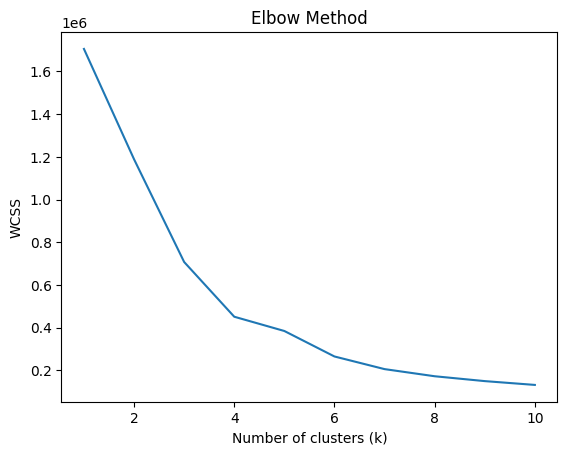

In [20]:
# applying the graph for wcss
# elbow method means
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
# The Elbow Method is a heuristic used to determine the optimal number of clusters in a clustering algorithm like K-Means.
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

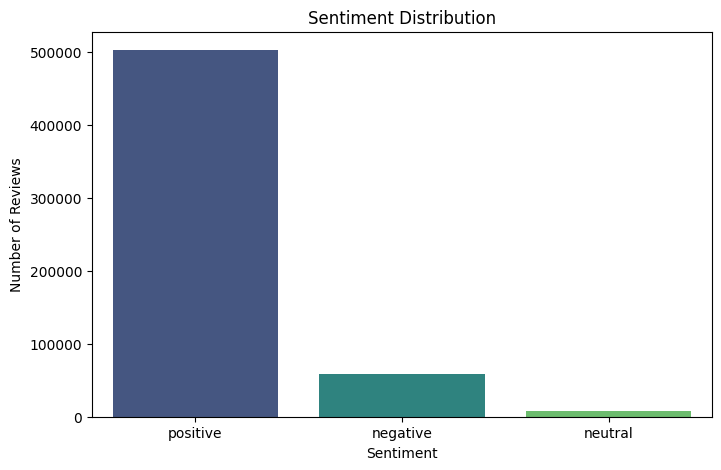

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of sentiment labels
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_label', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


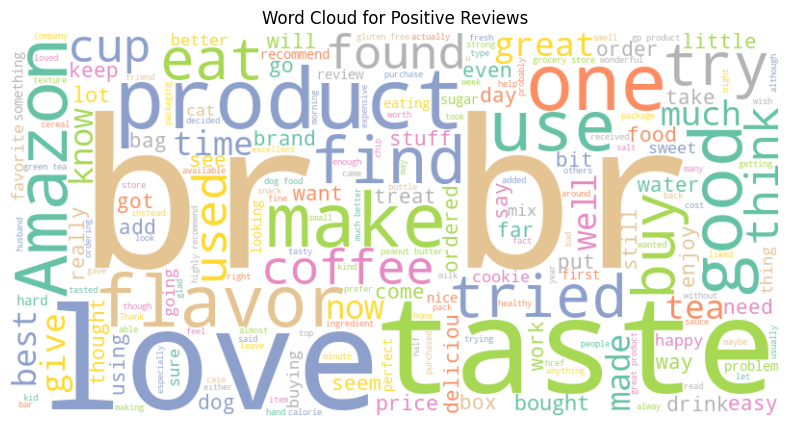

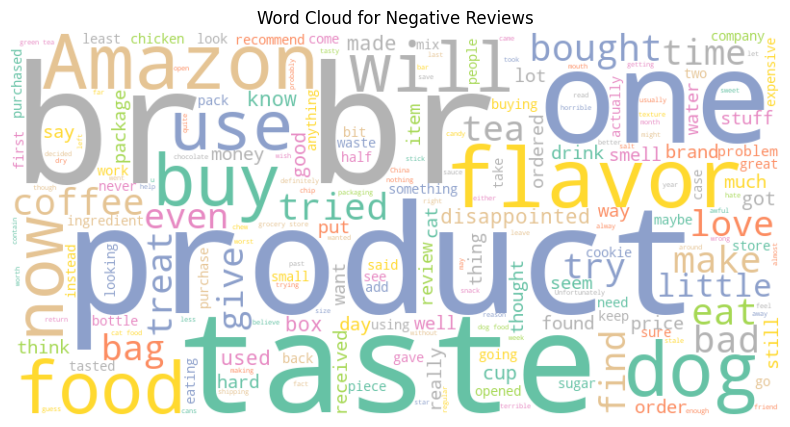

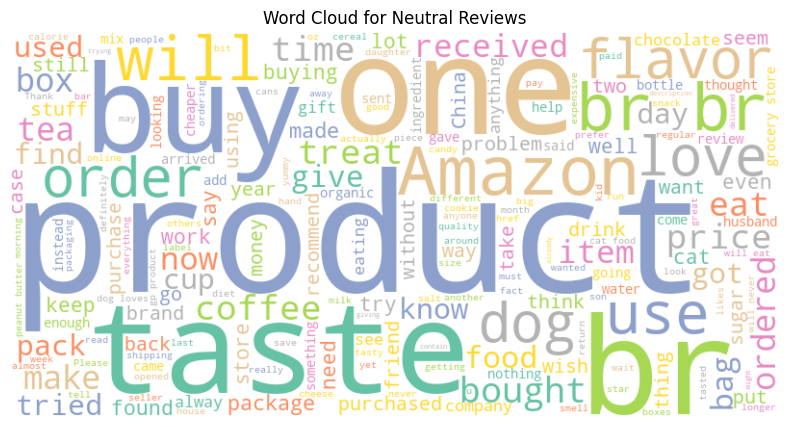

In [30]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment
for sentiment in ['positive', 'negative', 'neutral']:
    text = " ".join(data[data['sentiment_label'] == sentiment]['Text'].dropna())
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Reviews')
    plt.show()


In [31]:
# 3. Apply k-means clustering (let's assume k=3 based on the Elbow method):
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [32]:
# 4. Assign cluster labels to your data:
data['cluster'] = kmeans.labels_

In [33]:
import textblob

In [24]:
# importing the text blob
# text blob means It is a simple NLP library for Python, built on top of NLTK (Natural Language Toolkit) and Pattern.
from textblob import TextBlob

# Assuming your text data is in a column called 'Text'
data['sentiment_score'] = data['Text'].apply(lambda text: TextBlob(text).sentiment.polarity)
data['sentiment_label'] = data['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Print the data with TextBlob sentiment results
print(data[['Text', 'sentiment_score', 'sentiment_label']].head()) # Print first 5 rows, adjust as needed

                                                Text  sentiment_score  \
0  I have bought several of the Vitality canned d...         0.450000   
1  Product arrived labeled as Jumbo Salted Peanut...        -0.033333   
2  This is a confection that has been around a fe...         0.133571   
3  If you are looking for the secret ingredient i...         0.166667   
4  Great taffy at a great price.  There was a wid...         0.483333   

  sentiment_label  
0        positive  
1        negative  
2        positive  
3        positive  
4        positive  


In [27]:
# import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Convert sentiment_label to numerical for modeling
label_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
data['sentiment_encoded'] = data['sentiment_label'].map(label_mapping)

# Define features and target
X = data[['Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator']]
y = data['sentiment_encoded']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8839485975143151


In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 1. Prepare the text data:
text_data = data['Text'].tolist() # Assuming your text data is in the 'Text' column

# 2. Create a CountVectorizer:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english') # Customize parameters as needed
dtm = vectorizer.fit_transform(text_data) # Document-Term Matrix

# 3. Apply LDA:
# LDA stands for Latent Dirichlet Allocation. It's a probabilistic model 
# used in natural language processing (NLP) and machine learning for topic modeling.
lda_model = LatentDirichletAllocation(n_components=5, random_state=42) # Customize number of topics
lda_model.fit(dtm)

# 4. Print the topics:
for index, topic in enumerate(lda_model.components_):
    print(f"Topic #{index + 1}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print("\n")

Topic #1:
like good taste great flavor just love chocolate really eat


Topic #2:
br amazon product price great time order just box buy


Topic #3:
br water product sugar like taste use oil good flavor


Topic #4:
coffee tea br like flavor cup taste good just drink


Topic #5:
food br dog cat dogs like treats cats eat product


